In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px

import plotly.graph_objs as go
import plotly.io as pio

from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go

# 2023 World Happiness Report

# 1. Read and Analyze Data

- **Country name:** Country name
- **Ladder score:** known as the happiness score, average where people evaluate their country form 10 (most happy) to 0 (least hapy)
- **upperwhisker** and **lowerwhisker:**: upper bounds and lower bounds of ladder score
- **Logged GDP per capita:** Gross domestic product per capita
- **Healthy Life Expectancy:** an estaimte of years someone can expect to live in good health
- **Freedom to Make Life Choices:** perceived freedom, higher values suggest more autonomy in life choices
- **Generosity:** reflects peoples generosity in the country and how countrys support one another
- **Perceptions of Corruption:** Responces on how widespread corruption is perceived to be, lower values typically indicate people beleive their insitutions are more trustworhty
- **Ladder score in Dystopia:** represents the lowest possible values on each of the key expalantory factors, baseline score for which each contry's happiness is evaluated
- **Explained by...:** break down how much of the countries happiness score is accounted for by each of the six variables
- **Dystopia + Residual:** after allocating portions of the happiness scores on explantory factors, whatever is left over is what is not measured by the 6 varaibles

In [2]:
df = pd.read_csv('/Users/mollyrudisill/Documents/personal_code/world_happiness/WHR2023.csv')
df

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


In [3]:
df2 = pd.read_csv('/Users/mollyrudisill/Documents/personal_code/world_happiness/continents2.csv')
df2 = df2.drop(['alpha-2','country-code','iso_3166-2','region-code','sub-region-code', 'intermediate-region-code','intermediate-region'],axis=1)
df2 = df2.rename(columns={'name': 'Country name'})

In [4]:
df2

,Country name,alpha-3,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia
...,...,...,...,...
244,Wallis and Futuna,WLF,Oceania,Polynesia
245,Western Sahara,ESH,Africa,Northern Africa
246,Yemen,YEM,Asia,Western Asia
247,Zambia,ZMB,Africa,Sub-Saharan Africa


In [5]:
merged = df.merge(df2[['Country name', 'region', 'sub-region', 'alpha-3']], on='Country name')
#Merge region and sub-region into whr23score after country name
column_order = ['Country name', 'region', 'sub-region']
column_order = ['Country name', 'region', 'sub-region'] + [col for col in merged.columns if col not in column_order]
df = merged[column_order]

In [6]:
df = df.drop(['Standard error of ladder score','upperwhisker','lowerwhisker','Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual','Ladder score in Dystopia'],axis=1)

In [7]:
df.head()

,Country name,region,sub-region,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,alpha-3
0,Finland,Europe,Northern Europe,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,FIN
1,Denmark,Europe,Northern Europe,7.586,10.962,0.954,71.250,0.934,0.134,0.196,DNK
2,Iceland,Europe,Northern Europe,7.530,10.896,0.983,72.050,0.936,0.211,0.668,ISL
3,Israel,Asia,Western Asia,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,ISR
4,Netherlands,Europe,Western Europe,7.403,10.942,0.930,71.550,0.887,0.213,0.379,NLD


In [8]:
# Check for null
df.isnull().sum()

Country name                    0
region                          0
sub-region                      0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
alpha-3                         0
dtype: int64

In [9]:
df.shape

(126, 11)

In [10]:
df.nunique()

Country name                    126
region                            5
sub-region                       14
Ladder score                    123
Logged GDP per capita           125
Social support                  108
Healthy life expectancy         116
Freedom to make life choices    108
Generosity                      112
Perceptions of corruption       106
alpha-3                         126
dtype: int64

- ladder score in dystopia is all the same

In [11]:
# numerical dataset - explained by
dfnum = df[['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [12]:
# check for outlires
# no present outliers
fig = px.box(dfnum)
fig.update_layout(title="Varible Outliers")

# Step 2: Exploratory Data Analysis

In [13]:
df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,5.555238,9.451341,0.800048,64.951246,0.792119,0.021556,0.720786
std,1.152944,1.209392,0.130125,5.666557,0.111553,0.143248,0.178946
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.659500,8.592250,0.723000,60.717750,0.727750,-0.073000,0.658500
50%,5.730000,9.552000,0.831000,65.813500,0.803000,0.000500,0.771000
75%,6.333000,10.518250,0.902750,69.575000,0.877000,0.116250,0.845500
max,7.804000,11.660000,0.983000,74.349000,0.961000,0.531000,0.929000


In [14]:
matrix = dfnum.corr()
fig = px.imshow(matrix, 
                text_auto=True, 
                color_continuous_scale='Blues',
                title="Correlation Matrix")
fig.show()

- strongest correlation with the lader score:
    - Social Support: 0.838056
    - Logged GDP per Capita: 0.783836
    - Healthy Life Expectancy: 0.746928
    - Freedom to make life choices: 0.661960
    - Generosity: 0.039829
    - Perceptions of corruption: -0.470561


- Logged GDP per Capita and Healthy Life Expectancy: 0.8375331
- Logged GDP per Captia and Social Support: 0.74176
- Social Support and Healthy Life expectancy: 0.7255238
- Social Support and Freedom to make life choices: 0.5463187
- Perception of corruption seems have the most negative correatlions with other features

## distributions between features

In [15]:
fig = px.histogram(df, 'Ladder score')
median_value = df['Ladder score'].mean()
fig.add_vline(x=median_value, line_dash="solid", line_color="red", annotation_text=f"Median: {median_value:.2f}")
fig.update_layout(title='Ladder Score Distribution')
fig.show()

- 0-2 bin: Afghanistan: 1.859
- 2-2.5 bin: Lebanon: 2.392

In [16]:
# df[df['Ladder score'] <= df['Ladder score'].mean()].sort_values(by="Ladder score")

In [17]:
fig = px.histogram(df, 'Logged GDP per capita')
median_value = df['Logged GDP per capita'].mean()
fig.add_vline(x=median_value, line_dash="solid", line_color="red", annotation_text=f"Median: {median_value:.2f}")
fig.update_layout(title='GDP Distribution')
fig.show()

In [18]:
fig = px.histogram(df, 'Social support')
median_value = df['Social support'].mean()
fig.add_vline(x=median_value, line_dash="solid", line_color="red", annotation_text=f"Median: {median_value:.2f}")
fig.update_layout(title='Social Support Distribution')
fig.show()

In [19]:
fig = px.histogram(df, 'Healthy life expectancy')
median_value = df['Healthy life expectancy'].mean()
fig.add_vline(x=median_value, line_dash="solid", line_color="red", annotation_text=f"Median: {median_value:.2f}")
fig.update_layout(title='Healthy Life Distribution')
fig.show()

In [20]:
fig = px.histogram(df, 'Freedom to make life choices')
median_value = df['Freedom to make life choices'].mean()
fig.add_vline(x=median_value, line_dash="solid", line_color="red", annotation_text=f"Median: {median_value:.2f}")
fig.update_layout(title='Freedom Distribution')
fig.show()

In [21]:
fig = px.histogram(df, 'Generosity')
median_value = df['Generosity'].mean()
fig.add_vline(x=median_value, line_dash="solid", line_color="red", annotation_text=f"Median: {median_value:.2f}")
fig.update_layout(title='Generosity Distribution')
fig.show()

In [22]:
fig = px.histogram(df,'Perceptions of corruption')
median_value = df['Perceptions of corruption'].mean()
fig.add_vline(x=median_value, line_dash="solid", line_color="red", annotation_text=f"Median: {median_value:.2f}")
fig.update_layout(title='Perceptions of Corruption Distribution')
fig.show()

In [23]:
import plotly.subplots as sp
import plotly.graph_objs as go
import pandas as pd

In [24]:
# Create a subplot grid
fig = sp.make_subplots(rows=2, cols=3, subplot_titles=[
    'Ladder vs. GDP', 'Ladder vs. Social Support', 'Ladder vs. Life Expectancy',
    'Ladder vs. Freedom', 'Ladder vs. Generosity', 'Ladder vs. Corruption'
])

fig.add_trace(go.Scatter(x=df['Logged GDP per capita'], y=df['Ladder score'], mode='markers', name='GDP'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Social support'], y=df['Ladder score'], mode='markers', name='Social Support'), row=1, col=2)
fig.add_trace(go.Scatter(x=df['Healthy life expectancy'], y=df['Ladder score'], mode='markers', name='Life Expectancy'), row=1, col=3)
fig.add_trace(go.Scatter(x=df['Freedom to make life choices'], y=df['Ladder score'], mode='markers', name='Freedom'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['Generosity'], y=df['Ladder score'], mode='markers', name='Generosity'), row=2, col=2)
fig.add_trace(go.Scatter(x=df['Perceptions of corruption'], y=df['Ladder score'], mode='markers', name='Corruption'), row=2, col=3)

fig.update_layout(height=600, width=1000, title_text="Ladder Score vs Various Factors")
fig.show()

- generosity and corruption have the least correlation with laddar

In [25]:
regionscore = df.groupby('region')[['Ladder score']].mean().sort_values(by='Ladder score', ascending=False)
regionscore

,Ladder score
region,
Oceania,7.109000
Europe,6.528057
Americas,6.057619
Asia,5.295765
Africa,4.411588


In [26]:
fig = px.box(df, x='region', y='Ladder score', points='all', 
             title="Boxplot of Ladder Scores by Region",
             hover_data=['Country name'])  # Optional: to show country names on hover
fig

In [27]:
subregion = df.groupby('sub-region')[['Ladder score']].mean().sort_values(by='Ladder score', ascending=False)
subregion

,Ladder score
sub-region,
Australia and New Zealand,7.109000
Northern Europe,7.076800
Western Europe,7.054286
Northern America,6.927500
Southern Europe,6.095800
Latin America and the Caribbean,5.966053
Eastern Asia,5.934500
Eastern Europe,5.922000
Central Asia,5.828250


In [28]:
fig = px.sunburst(data_frame= df,
                  path=["region", "sub-region", "Country name"],
                  values="Ladder score",
                  color="Ladder score",
                  color_continuous_scale='RdYlGn',
                  width=1000, 
                  height=1000,
                  title = 'Happiness score sunburst - region / sub region / country')
fig.show()

In [29]:
#Visualise happiness score rankings on a global scale

happy_world_map = px.choropleth(df, locations = "alpha-3", 
              color = "Ladder score", scope = 'world', title = "Happiness Ranking World Map", 
              color_continuous_scale= "rdylgn_r", hover_name="Country name")
happy_world_map.show()

## top 10 countries

In [30]:
df.sort_values(by='Ladder score', ascending=False).head(10)

,Country name,region,sub-region,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,alpha-3
0,Finland,Europe,Northern Europe,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,FIN
1,Denmark,Europe,Northern Europe,7.586,10.962,0.954,71.250,0.934,0.134,0.196,DNK
2,Iceland,Europe,Northern Europe,7.530,10.896,0.983,72.050,0.936,0.211,0.668,ISL
3,Israel,Asia,Western Asia,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,ISR
4,Netherlands,Europe,Western Europe,7.403,10.942,0.930,71.550,0.887,0.213,0.379,NLD
5,Sweden,Europe,Northern Europe,7.395,10.883,0.939,72.150,0.948,0.165,0.202,SWE
6,Norway,Europe,Northern Europe,7.315,11.088,0.943,71.500,0.947,0.141,0.283,NOR
7,Switzerland,Europe,Western Europe,7.240,11.164,0.920,72.900,0.891,0.027,0.266,CHE
8,Luxembourg,Europe,Western Europe,7.228,11.660,0.879,71.675,0.915,0.024,0.345,LUX
9,New Zealand,Oceania,Australia and New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271,NZL


# linear regression model to estimate ladder score

In [31]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Example: Assuming df is your DataFrame
# and you identified these three features as most correlated with Ladder score:
features = ["Logged GDP per capita", "Social support", "Healthy life expectancy", 'Freedom to make life choices','Generosity','Perceptions of corruption']
target = 'Ladder score'

X = df[features]
y = df[target]

# Split the data into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² score on test data:", r2)
print("RMSE on test data:", rmse)
print("Intercept:", model.intercept_)
print("Coefficients:", list(zip(features, model.coef_)))

R² score on test data: 0.8591974644329314
RMSE on test data: 0.3760563713086261
Intercept: -2.601738878405703
Coefficients: [('Logged GDP per capita', 0.18502410665537214), ('Social support', 3.755160895568293), ('Healthy life expectancy', 0.030660132438295188), ('Freedom to make life choices', 2.31623909857807), ('Generosity', 0.3607264409078367), ('Perceptions of corruption', -0.624280278538341)]


In [32]:
comparison_df = pd.DataFrame({
    'Actual': y_test.round(2),
    'Predicted': y_pred.round(2)
})
comparison_df['Absolute Difference'] = np.abs((comparison_df['Actual'] - comparison_df['Predicted']))
comparison_df.sort_values(by='Absolute Difference')

,Actual,Predicted,Absolute Difference
77,5.28,5.27,0.01
55,5.90,5.92,0.02
67,5.63,5.69,0.06
53,5.95,5.89,0.06
44,6.12,6.01,0.11
76,5.33,5.20,0.13
19,6.66,6.52,0.14
40,6.14,6.32,0.18
11,7.10,6.91,0.19
91,4.88,5.11,0.23


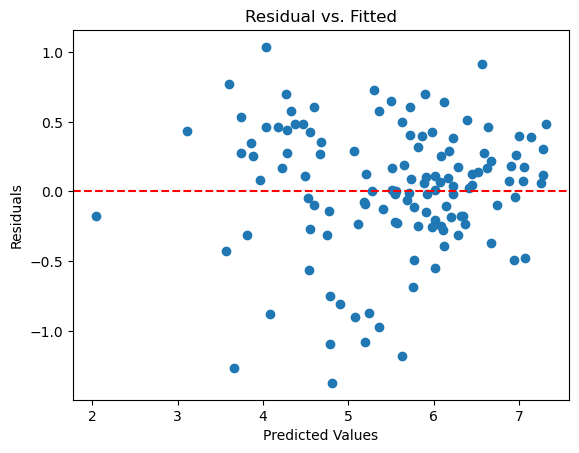

In [33]:
import matplotlib.pyplot as plt

y_pred = model.predict(X)
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual vs. Fitted")
plt.show()

# Random Forest Regressor Model

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Example: define your feature columns and target
features = ["Logged GDP per capita", "Social support", "Healthy life expectancy", 'Freedom to make life choices','Generosity','Perceptions of corruption'] 
target = "Ladder score"

X = df[features]
y = df[target]

# Split the data into training and testing sets
# Adjust test_size as appropriate (usually 0.2 or 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² score on test data:", r2)
print("RMSE on test data:", rmse)

# Feature importance
importances = rf_model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance}")

R² score on test data: 0.8513825185070067
RMSE on test data: 0.3863515526892375
Feature: Logged GDP per capita, Importance: 0.252229812863619
Feature: Social support, Importance: 0.560260643588952
Feature: Healthy life expectancy, Importance: 0.05005259393112167
Feature: Freedom to make life choices, Importance: 0.08347108240292843
Feature: Generosity, Importance: 0.02151717152370699
Feature: Perceptions of corruption, Importance: 0.0324686956896719


In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Using the best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("R² with best RF:", r2_best)
print("RMSE with best RF:", rmse_best)

Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
R² with best RF: 0.8577600347893846
RMSE with best RF: 0.3779710455123096


In [36]:

# Assume 'features' is your list of feature names
# and 'importances' is the feature_importances_ array from the trained model.
importances = rf_model.feature_importances_

# Sort the features by importance in descending order
sorted_indices = importances.argsort()[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

# Create a horizontal bar chart
fig = go.Figure(go.Bar(
    x=sorted_importances,
    y=sorted_features,
    orientation='h'
))

fig.update_layout(
    title="Feature Importances - Random Forest",
    xaxis_title="Importance",
    yaxis_title="Feature",
    margin=dict(l=100, r=20, t=50, b=50)
)

# Invert the y-axis to have the most important feature on top
fig.update_yaxes(autorange="reversed")

fig.show()

In [37]:
import plotly.graph_objs as go
import numpy as np

# Sample data
y_actual = np.array(y_test)  # Your actual values
y_pred_lr = model.predict(X_test)  # Predictions from linear regression
y_pred_rf = rf_model.predict(X_test)  # Predictions from Random Forest

# Create the plot
fig = go.Figure()

# Add scatter for Linear Regression
fig.add_trace(go.Scatter(x=y_actual, y=y_pred_lr, mode='markers', name='Linear Regression',
                         marker=dict(color='blue', opacity=0.5)))

# Add scatter for Random Forest
fig.add_trace(go.Scatter(x=y_actual, y=y_pred_rf, mode='markers', name='Random Forest',
                         marker=dict(color='green', opacity=0.5)))

# Add line for perfect predictions
fig.add_trace(go.Scatter(x=y_actual, y=y_actual, mode='lines', name='Perfect Fit', line=dict(color='red', dash='dash')))

fig.update_layout(title='Actual vs. Predicted Values',
                  xaxis_title='Actual Values',
                  yaxis_title='Predicted Values',
                  legend_title='Models')

fig.show()

In [38]:


metrics = ['R²', 'RMSE']
values_lr = [r2_score(y_actual, y_pred_lr), np.sqrt(mean_squared_error(y_actual, y_pred_lr))]
values_rf = [r2_score(y_actual, y_pred_rf), np.sqrt(mean_squared_error(y_actual, y_pred_rf))]

fig = go.Figure(data=[
    go.Bar(name='Linear Regression', x=metrics, y=values_lr),
    go.Bar(name='Random Forest', x=metrics, y=values_rf)
])

# Change the bar mode
fig.update_layout(barmode='group', title='Model Performance Comparison',
                  yaxis_title='Metric Values',
                  legend_title='Models')

fig.show()